In [5]:
import easyocr
import cv2
import easyocr
import numpy as np

reader = easyocr.Reader(
    ['en'],
    gpu=False,
    recog_network='best_accuracy',
    user_network_directory='../models',
    model_storage_directory='../models',
) # this needs to run only once to load the model into memory


# Read image as numpy array
image = cv2.imread('../examples/kz_book_simple.jpeg')

# Rotate the image by 270 degrees
# image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Convert the image from BGR to RGB (because OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Using CPU. Note: This module is much faster with a GPU.


In [6]:
results = reader.readtext(image = image)

Detected text: қоғамында көңінөн тарамады Араб жазуына бауыр басыт қалған (Probability: 0.62)
Detected text: қоғамытттыІ (Probability: 0.46)
Detected text: киришшө әрішпөн (Probability: 0.81)
Detected text: жазытатт (Probability: 0.53)
Detected text: жазба (Probability: 0.96)
Detected text: пілді (Probability: 0.44)
Detected text: баоқа (Probability: 0.93)
Detected text: бөрді 3 (Probability: 0.60)
Detected text: да өпеуметтік мөртебөлі істөрдө қолдана (Probability: 0.33)
Detected text: қоймаДтт. (Probability: 0.56)
Detected text: түота (Probability: 0.52)
Detected text: жатрла (Probability: 0.86)
Detected text: діни пойхопогияшық фактор шөшуші орында болды (Probability: 0.62)
Detected text: грамма (Probability: 0.73)
Detected text: Қазақ қоғамында >азба тіл бөдөпінің көтерілуі төте жазумөн (19]0 (Probability: 0.64)
Detected text: Сөй (Probability: 0.53)
Detected text: 19ЗО)байланыошы болды Ъайтұроынүлы (Probability: 0.44)
Detected text: жасаған әлішби (Probability: 0.53)
Detected text

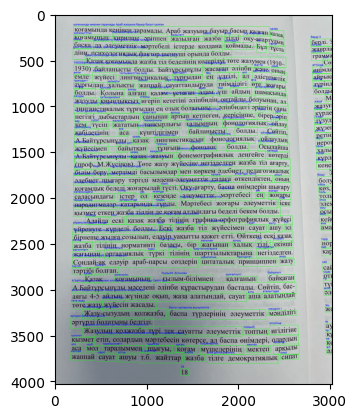

In [9]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load custom font
font_path = "./Ubuntu-Regular.ttf"
font = ImageFont.truetype(font_path, 32)

# Display the results
for (bbox, text, prob) in results:
    # Get the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Convert the OpenCV image to a PIL image, draw the text, then convert back to an OpenCV image
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(image_pil)
    draw.text((top_left[0], top_left[1] - 40), text, font=font, fill=(0, 0, 255))
    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

# Save image
cv2.imwrite('./model_output.jpg', image)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# results


In [8]:
results

[([[200, 135], [2330, 135], [2330, 243], [200, 243]],
  'қоғамында көңінөн тарамады Араб жазуына бауыр басыт қалған',
  0.6155520308013614),
 ([[205, 227], [591, 227], [591, 292], [205, 292]],
  'қоғамытттыІ',
  0.4624768889630957),
 ([[622, 216], [1226, 216], [1226, 320], [622, 320]],
  'киришшө әрішпөн',
  0.813032649078326),
 ([[1259, 248], [1575, 248], [1575, 303], [1259, 303]],
  'жазытатт',
  0.5314000784962246),
 ([[1609, 230], [1814, 230], [1814, 302], [1609, 302]],
  'жазба',
  0.9625659213360026),
 ([[1843, 227], [2012, 227], [2012, 305], [1843, 305]],
  'пілді',
  0.4398131165518499),
 ([[200, 295], [401, 295], [401, 376], [200, 376]],
  'баоқа',
  0.9281856747550403),
 ([[2781, 271], [3024, 271], [3024, 349], [2781, 349]],
  'бөрді 3',
  0.600478890798985),
 ([[419, 301], [1825, 301], [1825, 411], [419, 411]],
  'да өпеуметтік мөртебөлі істөрдө қолдана',
  0.3267731108148492),
 ([[1845, 310], [2158, 310], [2158, 388], [1845, 388]],
  'қоймаДтт.',
  0.5628562758375335),
 ([[

In [10]:
reader.readtext(image = image, paragraph=True)

[[[[160, 91], [2656, 91], [2656, 3940], [160, 3940]],
  'қоғамында көңінөн тарамады Араб жазуына бауыр басыт қалған қазақ қоғамыттты қоытыында керіш€ршя рамады Ажыпаз уынабауырбасы ғлаант жазытатт қазақ бабағ 7М!Ідөпьметтік тойро8 Л?арз қолдараттөнт жазылған жазба қймадп оқу-аңар түтаың дбаоигишік факЛ шМ барпдк бомортебөпші істерде қолдатта қоймадтт Б түста "ДіН ҚааққоғымыырлысыІ Ю1 ЯДзы!ЮКкі}раы ІОЫалез Ісіуші орында болды 19ЗО)ба ила еж крлқозарызында жазба тіл бөдепінің көнерізлфі ӨтеЖазУжтт т (]ң0 19З0)жрайланысты болды. >ца саат өлішби Байтұры үшы ә2стӨлӨк өмте титтывиотттка лық алт оІыІҢ өмте жүйесі "тиІІВхабй КаЛырауаттандыруда ІДан ӨЦ д7лірші з" алт Өте өдіохалөшік түрғыдатт халықты ваурғыдақлығ алықты )ашқала түотағана ууаанДъару да үшитімліттіті ҮШ ӨШтамабыда ары алғаш жауы ДЪТ. Қолыпа алғаш қаІтенутіні :йосуаш г`ашайльф ацкзмн алүшІ айдытц шамаоында жазуды \'қитындықоыз игеріш "тиҒайбукалық қитындықызықыаяыыны игөрітт кететіні әліпбидіңюыд ЙІб опуынан ат \'тыығдыыбтслыйң Ка